In [1]:
## importing essential libraries

import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


from bs4 import BeautifulSoup
from requests_html import HTMLSession

import random

from wordcloud import WordCloud

# Natural Language processing
## WEB SCRAPPING

In [2]:
#initializing HTTP session
session=HTMLSession()


In [3]:

## only extracting the paragraph form the url
def get_all_forms(url):
    
    res=session.get(url)
    
    soup= BeautifulSoup(res.html.html,"html.parser")
    
    return soup.find_all("p")# returns the paragraph

In [4]:
list_of_url=['https://www.medicalnewstoday.com/articles/256521#mers'
             ,'https://www.webmd.com/lung/covid-19-symptoms#1',
              'https://www.health.harvard.edu/diseases-and-conditions/preventing-the-spread-of-the-coronavirus']
new_filtered=[]
for i in range(len(list_of_url)):
    print(list_of_url[i])
    
    List_paragraph=get_all_forms(list_of_url[i])
    
    #converting it to a string
    for points in List_paragraph:
        new_filtered_text=str(points.text)
    
        new_filtered.append(new_filtered_text)
        
        

https://www.medicalnewstoday.com/articles/256521#mers
https://www.webmd.com/lung/covid-19-symptoms#1
https://www.health.harvard.edu/diseases-and-conditions/preventing-the-spread-of-the-coronavirus


In [5]:
new_filtered

['This article was updated on May 21, 2020',
 'Coronaviruses typically affect the respiratory tracts of birds and mammals, including humans. Doctors associate them with the common cold, bronchitis, pneumonia, severe acute respiratory syndrome (SARS), and coronavirus disease 2019 (COVID-19). These viruses can also affect the gut.',
 'Coronaviruses usually cause the common cold, though they can be responsible for more severe illnesses. ',
 'Over the past 70 years, scientists have found that these viruses can infect mice, rats, dogs, cats, turkeys, horses, pigs, and cattle. Sometimes, these animals transmit the viruses to humans.',
 'Most recently, authorities identified a new coronavirus outbreak in China that has now reached other countries. The virus is called severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) and it can cause COVID-19.',
 'In this article, we explain the different types of human coronavirus, their symptoms, and how people transmit them. We also focus on thre

In [6]:
New_Extracted_paragraph = ' '.join([str(elem) for elem in new_filtered ]) 
print(New_Extracted_paragraph)

This article was updated on May 21, 2020 Coronaviruses typically affect the respiratory tracts of birds and mammals, including humans. Doctors associate them with the common cold, bronchitis, pneumonia, severe acute respiratory syndrome (SARS), and coronavirus disease 2019 (COVID-19). These viruses can also affect the gut. Coronaviruses usually cause the common cold, though they can be responsible for more severe illnesses.  Over the past 70 years, scientists have found that these viruses can infect mice, rats, dogs, cats, turkeys, horses, pigs, and cattle. Sometimes, these animals transmit the viruses to humans. Most recently, authorities identified a new coronavirus outbreak in China that has now reached other countries. The virus is called severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) and it can cause COVID-19. In this article, we explain the different types of human coronavirus, their symptoms, and how people transmit them. We also focus on three particularly dangero

# Appliying out NLP technique in our filtered text

## Creating a  Cleaning function

In [7]:
def clean_message_no_html(New_Extracted_paragraph, stemmer=PorterStemmer(), stop_words=set(stopwords.words('english'))):
    
    
    # Converts to lower case and splits up the word
    words=word_tokenize(New_Extracted_paragraph.lower())
       
    filtered_words= []
    
    for word in words:
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    
    return filtered_words

In [8]:
##
clean_text=clean_message_no_html(New_Extracted_paragraph)
type(clean_text)

list

In [9]:
#fining the unique words

unique_words= pd.Series(clean_text).value_counts()
unique_words[:20]

symptom       53
coronaviru    52
infect        43
peopl         42
viru          41
may           32
diseas        30
person        29
spread        27
caus          27
mask          26
includ        23
distanc       23
breath        22
help          22
touch         22
doctor        20
also          19
sever         17
surfac        17
dtype: int64

# Visualizign using wordcloud

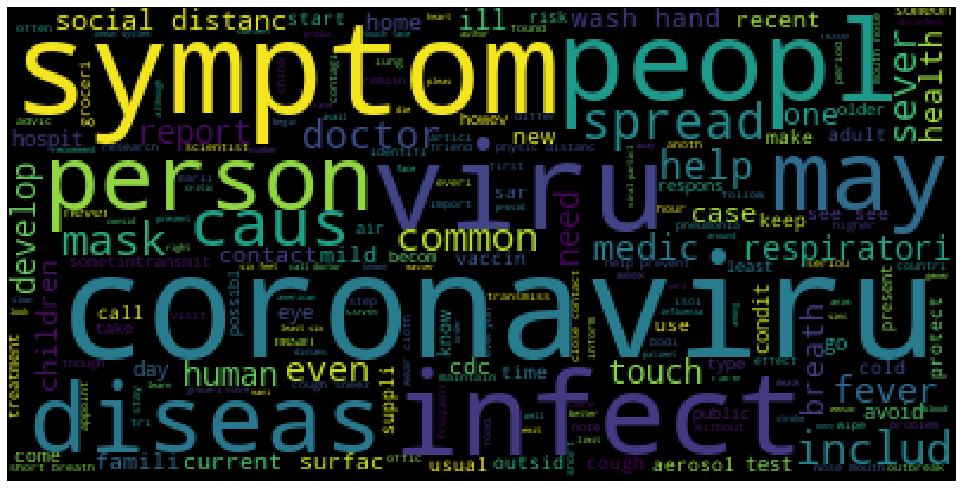

In [10]:
#convering filtered list to string
Final_Cleaned_String = ' '.join([str(elem) for elem in clean_text]) 

plt.figure(figsize=[17,12])
word_cloud=WordCloud().generate(Final_Cleaned_String)
plt.axis('off')
plt.imshow(word_cloud)
plt.show()

# Using a sentence Tokenizer to get  a list of sentence


In [11]:
sentence_list=nltk.sent_tokenize(New_Extracted_paragraph)

In [12]:
print(sentence_list)

['This article was updated on May 21, 2020 Coronaviruses typically affect the respiratory tracts of birds and mammals, including humans.', 'Doctors associate them with the common cold, bronchitis, pneumonia, severe acute respiratory syndrome (SARS), and coronavirus disease 2019 (COVID-19).', 'These viruses can also affect the gut.', 'Coronaviruses usually cause the common cold, though they can be responsible for more severe illnesses.', 'Over the past 70 years, scientists have found that these viruses can infect mice, rats, dogs, cats, turkeys, horses, pigs, and cattle.', 'Sometimes, these animals transmit the viruses to humans.', 'Most recently, authorities identified a new coronavirus outbreak in China that has now reached other countries.', 'The virus is called severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) and it can cause COVID-19.', 'In this article, we explain the different types of human coronavirus, their symptoms, and how people transmit them.', 'We also focus o

## Return Greeting response to a user

In [13]:
#Citation
#This function was used from https://everythingcomputerscience.com/


def greeting_response(text):
    text=text.lower()
    
    bot_greetings=['hi','nameste','hello','hola']
    
    user_greetings=['hi','howdy','hey','nameste','hello','hola']
    
    
    general_questions=['how are you','I am good. Thank you',
           'creator?','Aayush is this bot creator',
           'weather','preety Good']
    for word in text.split():
        
        if word in user_greetings:
               
            return random.choice(bot_greetings)
        
        if word in general_questions:
            answer=general_questions.index(word)
            return (general_questions[answer+1])

In [14]:
#function to sort our index
def index_sort(list_var):
    length=len(list_var)
    list_index=list(range(0,length))
    x=list_var
    for i in range(length):
        for j in range(length):
            if x[list_index[i]]>x[list_index[j]]:
                temp=list_index[i]
                list_index[i]=list_index[j]
                list_index[j]=temp
    return list_index

# Creating the response for the bot for certain input

In [15]:
#Citation
#This function was used from https://everythingcomputerscience.com/

# The user is going to input certain text and the word inputed by the user will be analyzed 
# and the best sentence from our sentence list will be outputed


def bot_respose(user_input):
    #We need to make sure the data typed by the user is lower case
    user_input=user_input.lower()
    
    #appending the user input in the last of our sentence
    sentence_list.append(user_input)
    
    #The bot response will initially be empty
    bot_response=''
    
    #Creating a count matrix. We are going to transofrm sentence list into a count matrix
    cm=CountVectorizer().fit_transform(sentence_list)
    
    #finding the similarity score for the user input
    #note the user input is going to be in the last of our sentice list
    # comparing the user input with all the sentence expect the last matrix
    similarity_scores=cosine_similarity(cm[-1],cm)
     
    #Flattening four similarity scores so that we reduce the dimantionality
    similarity_scores_list=similarity_scores.flatten()
    
    #finidng the index of the highest score from our similiarity score
    index=index_sort(similarity_scores_list)
    
    index=index[1:]
    
    response_flag=0
    
    j=0
    
    for i in  range(len(index)):
        #since we have arranged our similarity score in a order the first two data with the index will be outputed
        if similarity_scores_list[index[i]]>0.0:
            bot_response= bot_response + ' '+ sentence_list[index[i]]
            # The response flag will be converted to 1 and the next the text didn't found condition will not be executed
            response_flag=1
            #when the j value is 3 it will break
            j=j+1
        if j>3:
            break
            
    if response_flag==0:
        bot_response= 'I apologize, I do not know how to answer that '
       
    sentence_list.remove(user_input)
    
    return bot_response

## Chat 

In [16]:
print('Hello, This is Article Expert. Ask me about the article')
exit_terms=['exit','bye','quit','break']

while(True):
    user_input=input()
    if user_input.lower() in exit_terms:
        print('Have a good day')
        break
    
    if greeting_response(user_input) != None:
        print( greeting_response(user_input))
    else:
        print('Corone Expert:'+bot_respose(user_input) )

Hello, This is Corona Expert. Ask me about Corona Virus
exit
Have a good day
